<h1 align="center">
  <Strong>Sepsis Analysis and Prediction Using FastAPI</strong>
</h1>


## Introduction
**APIs** work by sharing data between applications, systems, and devices. This happens through a request and response cycle. A user initiates a request for data by interacting with an application. The request is sent to the API, which retrieves the data and returns it to the user. [Postman](https://www.postman.com/what-is-an-api/)

**FastAPI** is a modern, fast (high-performance), web framework for building APIs with Python 3.8+ based on standard Python type hints.[FastAPI](https://fastapi.tiangolo.com/)

The key features are:

***Fast:*** Very high performance, on par with NodeJS and Go (thanks to Starlette and Pydantic). One of the fastest Python frameworks available.

***Fast to code:*** Increase the speed to develop features by about 200% to 300%. *

***Fewer bugs:*** Reduce about 40% of human (developer) induced errors. *

***Intuitive:*** Great editor support. Completion everywhere. Less time debugging.

***Easy:*** Designed to be easy to use and learn. Less time reading docs.

***Short:*** Minimize code duplication. Multiple features from each parameter declaration. Fewer bugs.

***Robust:*** Get production-ready code. With automatic interactive documentation.

***Standards-based:*** Based on (and fully compatible with) the open standards for APIs: OpenAPI (previously known as Swagger) and JSON Schema.

Sepsis, characterized by a dysregulated immune response to infection, stands as a critical global health challenge, claiming countless lives annually. Its rapid progression and often elusive symptoms make early detection and intervention paramount. This introduction prepares us to carefully look into the dataset, forming the basis for the project goals. By closely examining the details of sepsis using data analysis, I aim to add to what I know, helping to create better and more focused ways to recognize and handle sepsis early. 

## Objective
This project aims to develop a predictive model for sepsis, utilizing advanced data analysis techniques to forecast the likelihood of an individual developing sepsis based on key indicators from available datasets. The significance of this predictive model lies in its potential to facilitate early detection, thereby improving patient outcomes, reducing mortality rates, and optimizing the allocation of medical resources and create an API that will requested to interact with a ML model.

This endeavor addresses the needs of various stakeholders, including healthcare providers who can benefit from improved early detection for prompt treatment, patients who may experience better outcomes with timely interventions, healthcare institutions that can optimize resource utilization, and researchers contributing to the growing body of knowledge in sepsis prediction. Additionally, public health organizations stand to gain insights for developing targeted strategies, potentially reducing the overall burden of sepsis on healthcare systems. 

APIs enable different software systems to communicate and interact with each other seamlessly. This promotes interoperability between applications, allowing them to work together and share data in a standardized manner.

APIs allow developers to create modular systems by breaking down complex applications into smaller, independent components. This modularity enhances scalability, as individual components can be updated or replaced without affecting the entire system.

## Data requirement
Historical Sepsis [data](https://www.kaggle.com/datasets/chaunguynnghunh/sepsis?select=README.md)

### Import/ Install Required Libraries

In [13]:
# libraries for handling data
from sklearn import metrics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# data visualizations
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px


# pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import RandomOverSampler
from scipy import stats

# models
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, fbeta_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pprint import pprint

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

##save model
import joblib
import zipfile
import os
import pickle

### Data Preview

In [14]:
#reading in data
test = pd.read_csv(r"C:\Users\Alvin\Desktop\Sepsis_Prediction_API\Datasets\Paitients_Files_Test.csv")
train = pd.read_csv(r"C:\Users\Alvin\Desktop\Sepsis_Prediction_API\Datasets\Paitients_Files_Train.csv")

In [15]:
#data preview
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Hypothesis
**(H<sub>0</sub>):** There is no significant association between the attributes (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) and the likelihood of a patient in the ICU developing sepsis.

**(H<sub>1</sub>):** There exists a significant association between at least one of the attributes (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) and the likelihood of a patient in the ICU developing sepsis.


### Questions

- What proportion of patients in the dataset holds valid insurance cards, and is there a noticeable difference in the development of sepsis between insured and uninsured patients?

- Are the atributes of the datatset (PRG, PL, PR, SK, TS, M11, BD2, Age) in anyway correlated with Sepsis

- Top 10 patients with the higest BMI

- what is the effect of plasma glucose on sepsis

- which Bloodwork result has the highest number of patients with sepsis


### CRISP-DM Framework
- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment

## Data Understanding

### Data Collection
Data for this project located on [Kaggle](https://www.kaggle.com/datasets/chaunguynnghunh/sepsis?select=README.md)

**File Descriptions and Data Field Information**

|Column Name	|Attribute/Target|	Description|
|---------------|----------------|-------------|
|ID	|N/A	|Unique number to represent patient ID|
|PRG	|Attribute1	|Plasma glucose|
|PL	|Attribute 2	|Blood Work Result-1 (mu U/ml)|
|PR	|Attribute 3	|Blood Pressure (mm Hg)|
|SK	|Attribute 4	|Blood Work Result-2 (mm)|
|TS	|Attribute 5	|Blood Work Result-3 (mu U/ml)|
|M11	|Attribute 6	|Body mass index (weight in kg/(height in m)^2)|
|BD2	|Attribute 7	|Blood Work Result-4 (mu U/ml)|
|Age	|Attribute 8	|patients age (years)|
|Insurance	|N/A	|If a patient holds a valid insurance card|
|Sepssis	|Target	|Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise|

### Data Exploration

In [16]:
# Train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


The train dataset appears to be a pandas DataFrame with 599 entries and 11 columns

The dataset does not have any missing values, as all columns have 599 non-null entries. It's also worth noting the data types of each column, including integers (int64), floating-point numbers (float64), and object types (likely strings or mixed types)

In [17]:
#test info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


The test dataset is also a pandas DataFrame with 169 entries and 10 columns.

Similar to the previous dataset, there are no missing values, as all columns have 169 non-null entries. The data types include integers (int64), floating-point numbers (float64), and an object type (likely strings or mixed types)

In [18]:
#checking for missing values for train
train[train.isnull()].any()

ID           False
PRG          False
PL           False
PR           False
SK           False
TS           False
M11          False
BD2          False
Age          False
Insurance    False
Sepssis      False
dtype: bool

In [19]:
#checking for missing values for test
test[test.isnull()].any()

ID           False
PRG          False
PL           False
PR           False
SK           False
TS           False
M11          False
BD2          False
Age          False
Insurance    False
dtype: bool

In [20]:
#check for duplicated rows in train
train.duplicated().any()

False

In [21]:
#check for duplicated rows in test
test.duplicated().any()

False

In [22]:
train.Sepssis.value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [23]:
#function to check vakue counts for each column in the dataset

def display_value_counts(dataframe):
    for column in dataframe.columns:
        if column != 'ID':print(f"\nValue Counts for {column}:")
        print(dataframe[column].value_counts())

In [24]:
#function application
display_value_counts(train)

ID
ICU200010    1
ICU200404    1
ICU200406    1
ICU200407    1
ICU200408    1
ICU200409    1
ICU200410    1
ICU200411    1
ICU200412    1
ICU200413    1
ICU200414    1
ICU200415    1
ICU200416    1
ICU200417    1
ICU200418    1
ICU200419    1
ICU200420    1
ICU200405    1
ICU200403    1
ICU200385    1
ICU200402    1
ICU200387    1
ICU200388    1
ICU200389    1
ICU200390    1
ICU200391    1
ICU200392    1
ICU200393    1
ICU200394    1
ICU200395    1
ICU200396    1
ICU200397    1
ICU200398    1
ICU200399    1
ICU200400    1
ICU200401    1
ICU200421    1
ICU200422    1
ICU200423    1
ICU200424    1
ICU200443    1
ICU200444    1
ICU200445    1
ICU200446    1
ICU200447    1
ICU200448    1
ICU200449    1
ICU200450    1
ICU200451    1
ICU200452    1
ICU200453    1
ICU200454    1
ICU200455    1
ICU200456    1
ICU200457    1
ICU200442    1
ICU200441    1
ICU200440    1
ICU200431    1
ICU200425    1
ICU200426    1
ICU200427    1
ICU200428    1
ICU200429    1
ICU200430    1
ICU200432    1
ICU2004

### Univariarte Analysis

**Plasma Glucose (PRG)**

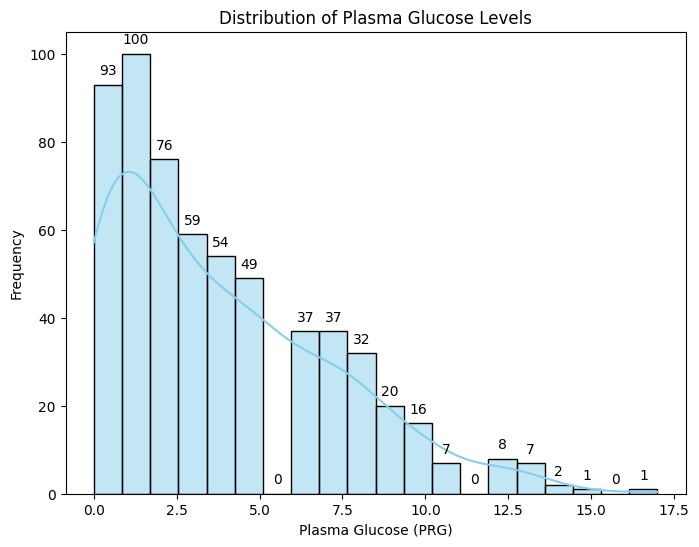

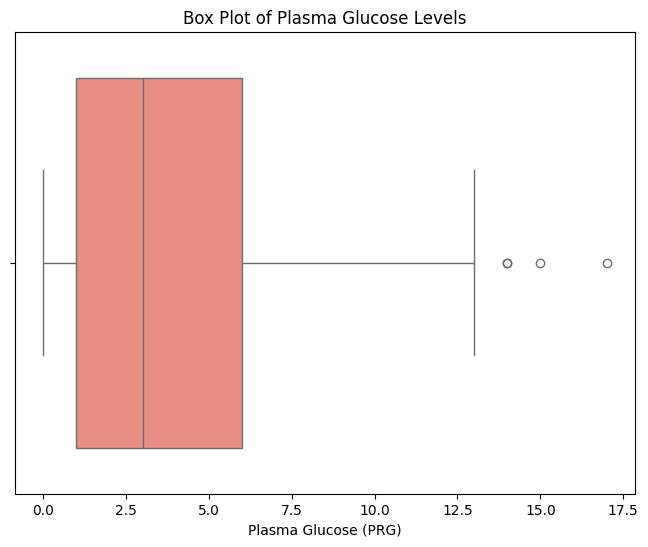

In [25]:
# Visualize the distribution using a histogram
plt.figure(figsize=(8, 6))
ax = sns.histplot(train['PRG'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Plasma Glucose Levels')
plt.xlabel('Plasma Glucose (PRG)')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Check for outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['PRG'], color='salmon')
plt.title('Box Plot of Plasma Glucose Levels')
plt.xlabel('Plasma Glucose (PRG)')
plt.show()


- There is a concentration of data points towards the lower end of the scale with a tail extending towards higher values

- The majority of individuals in the dataset have plasma glucose levels within a common normal range.

- There are relatively fewer individuals with extremely high plasma glucose levels, contributing to the rightward skewness.

- The right tail of the distribution contain outliers or extreme values. It's essential to investigate these values, as they could represent abnormal conditions or measurement errors.

**Blood Work Results (PL, SK, TS, BD2)**

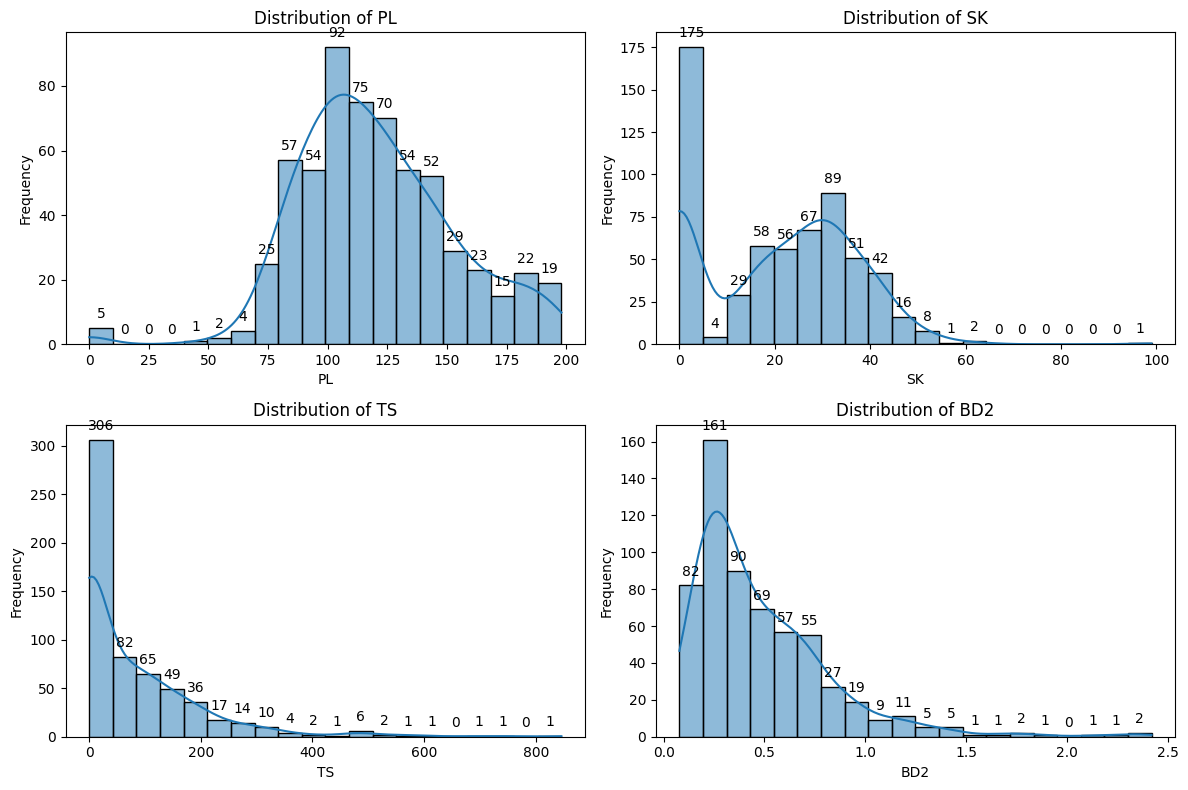

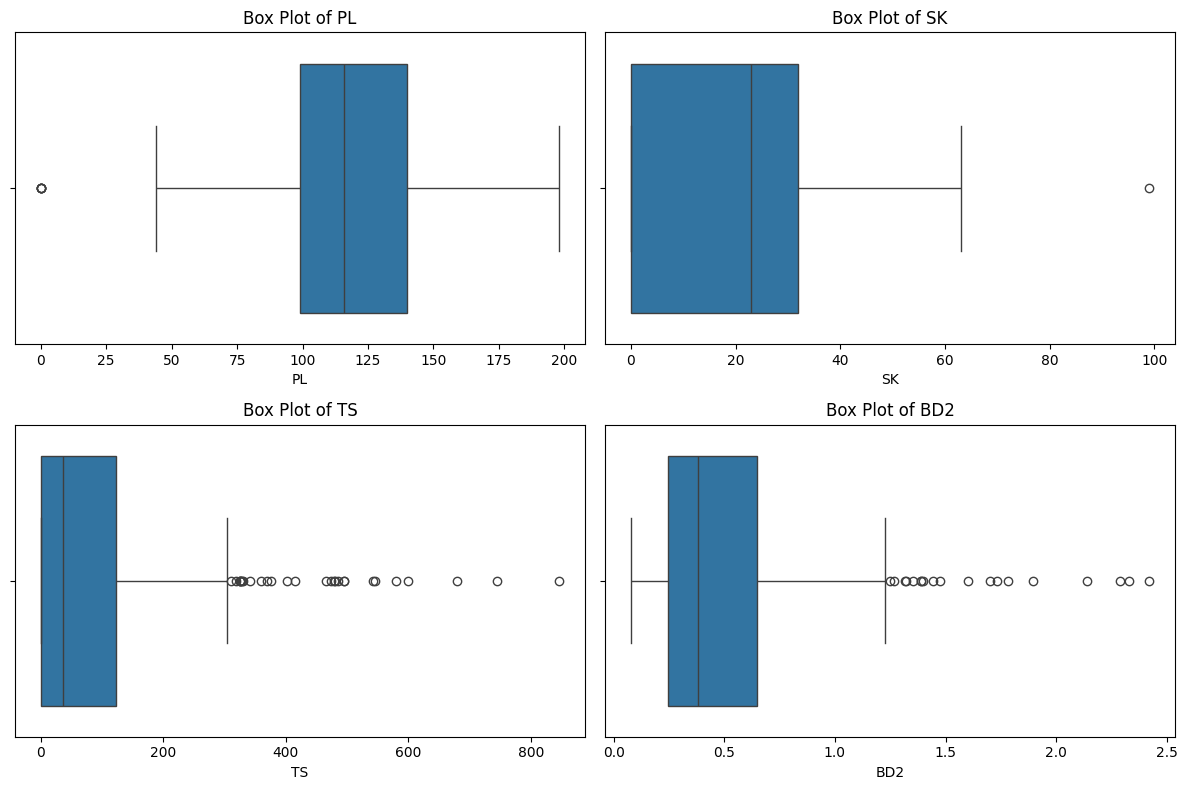

In [26]:
# Create histograms for each blood work result
plt.figure(figsize=(12, 8))
for i, column in enumerate(['PL', 'SK', 'TS', 'BD2'], 1):
    plt.subplot(2, 2, i)
    ax = sns.histplot(train[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Box plots for each blood work result
plt.figure(figsize=(12, 8))
for i, column in enumerate(['PL', 'SK', 'TS', 'BD2'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

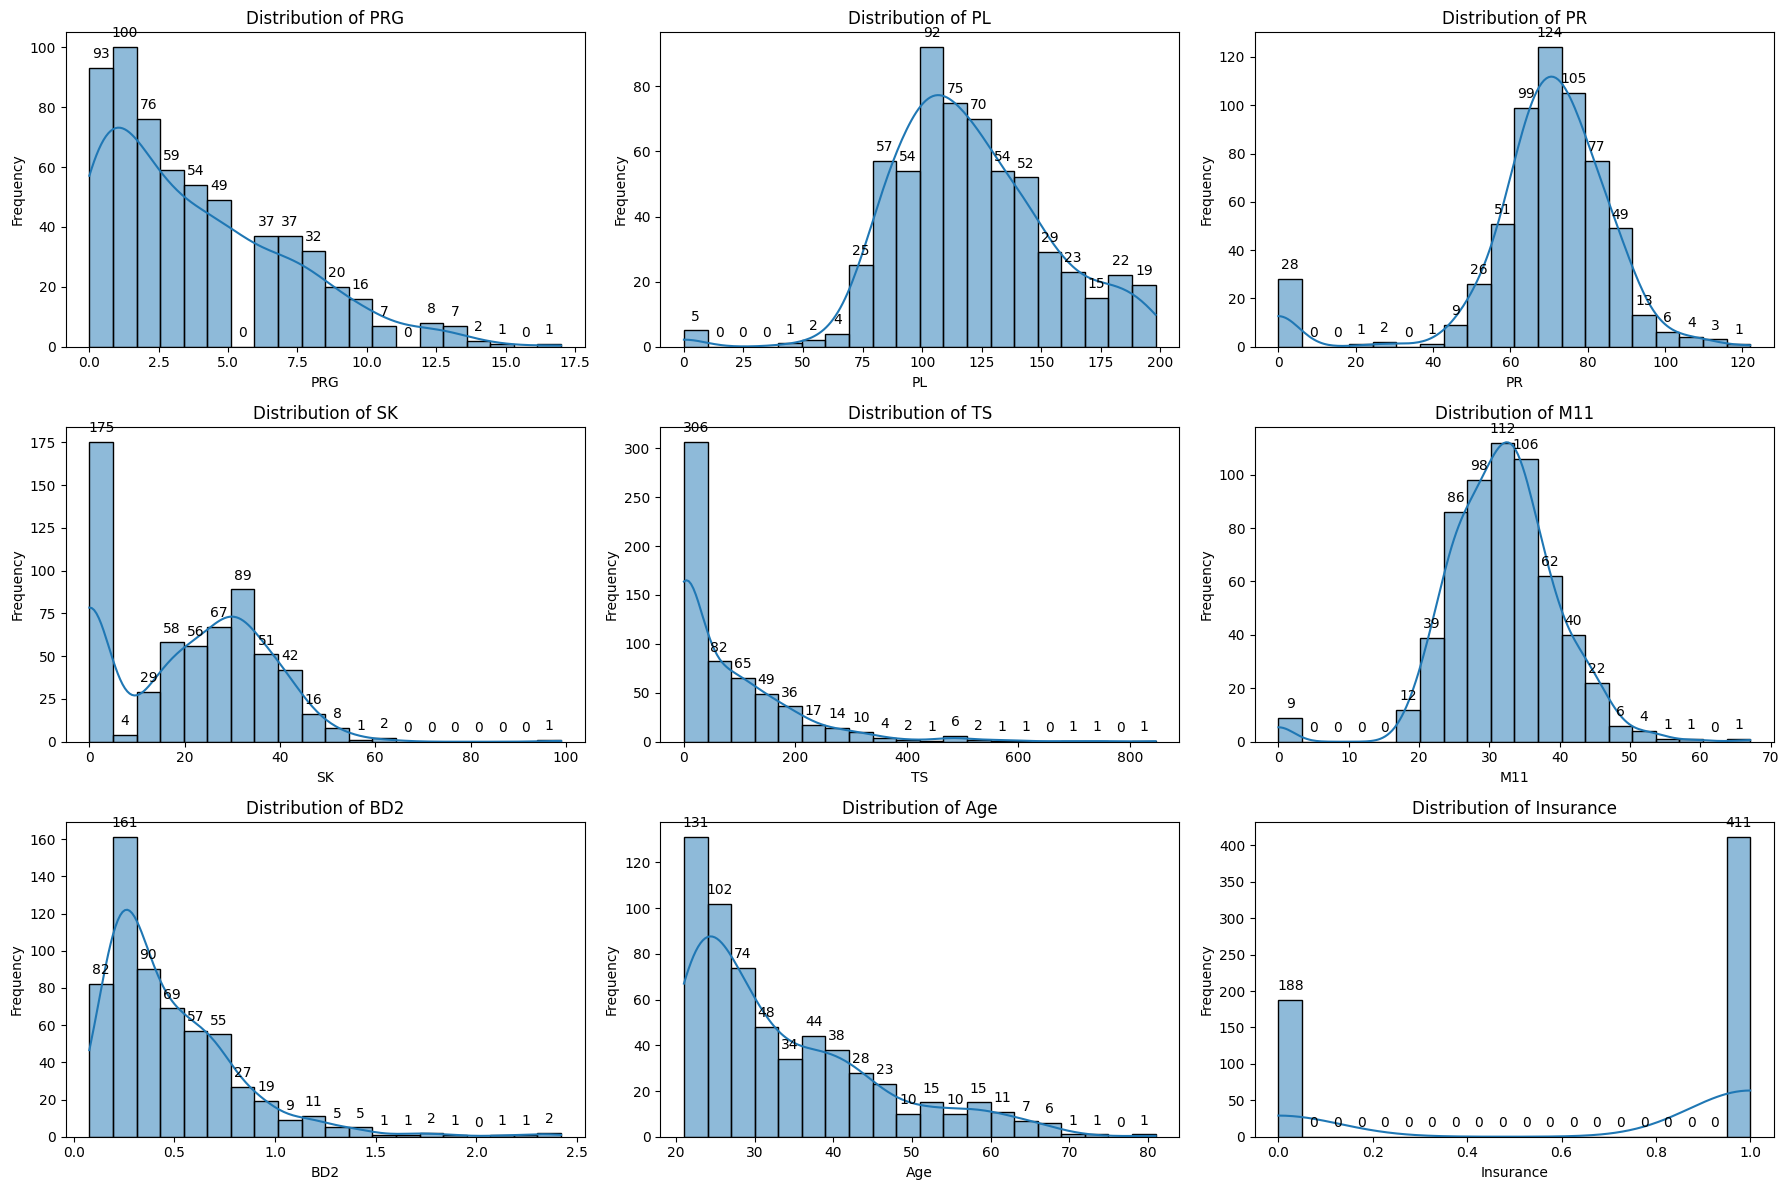

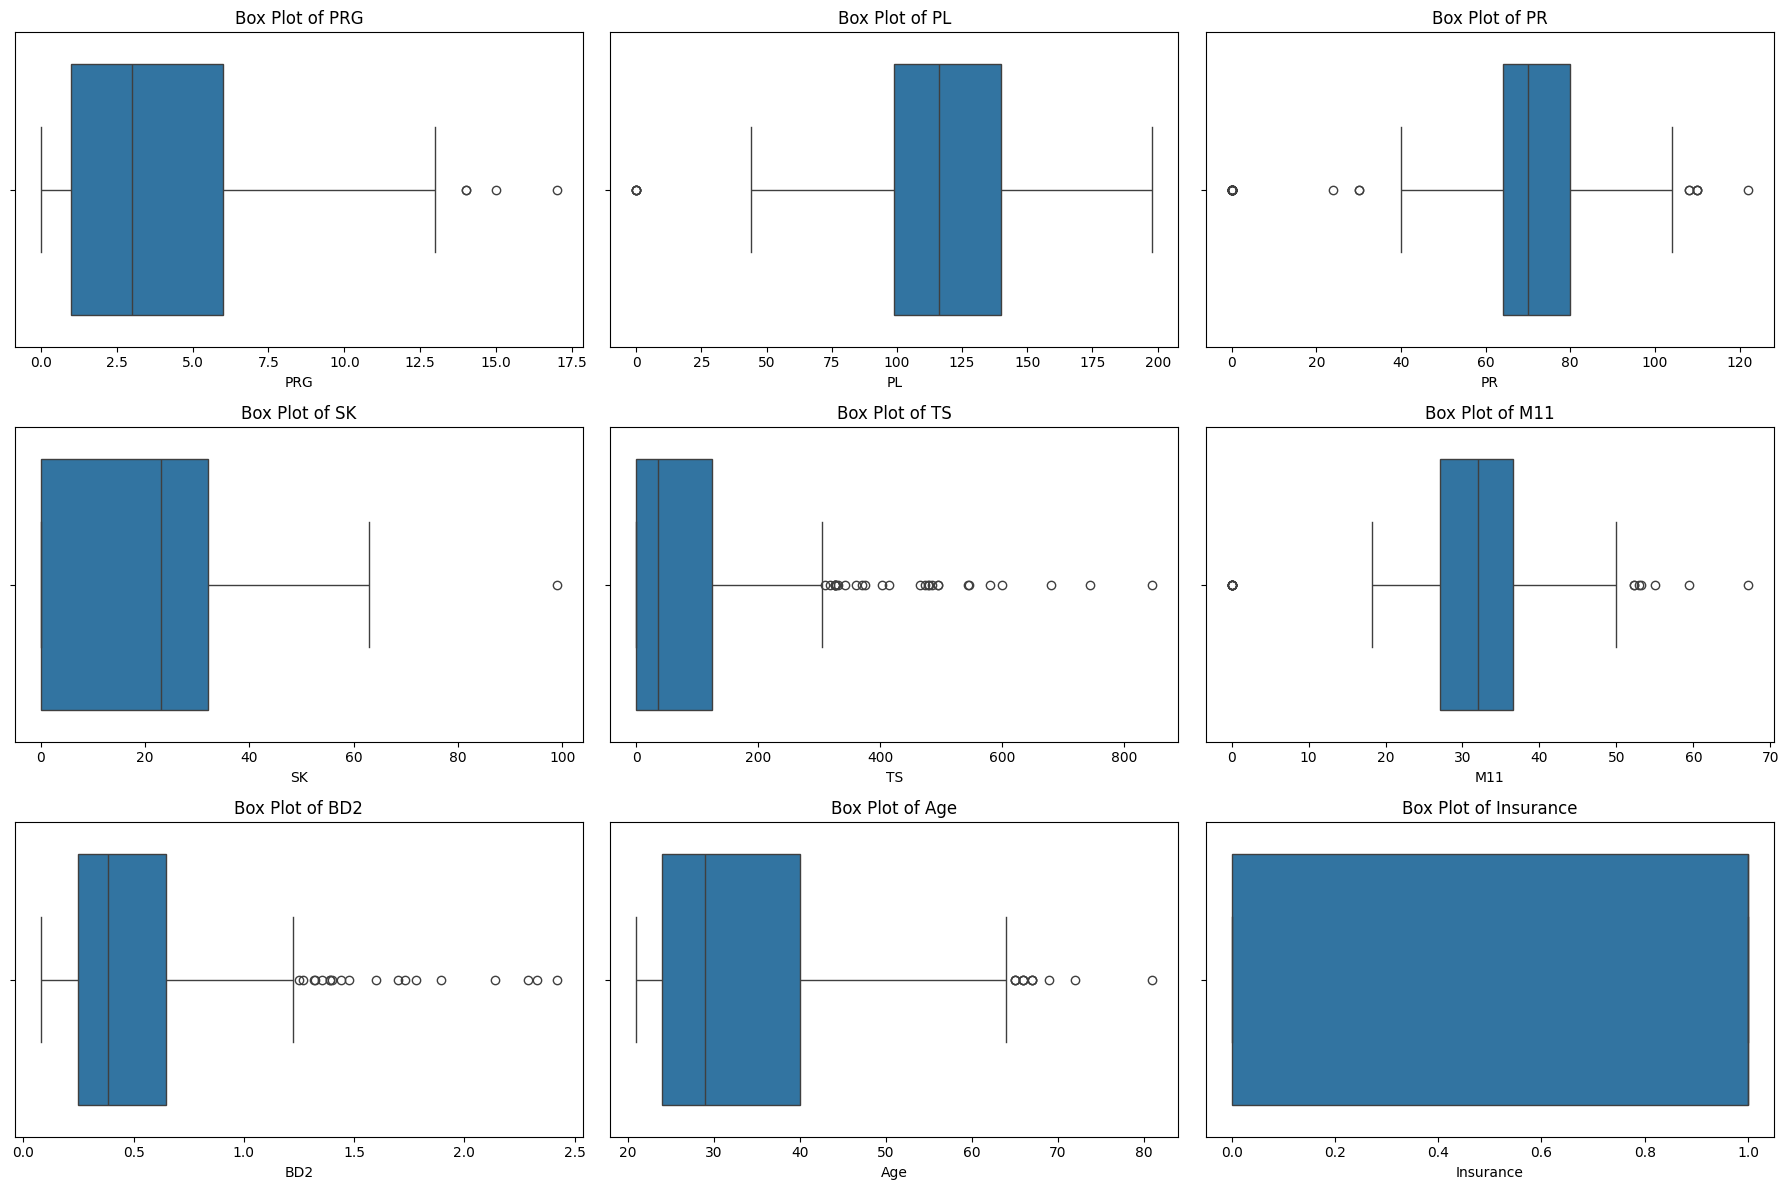

In [27]:
# Distribution plots for each column
plt.figure(figsize=(18, 12))
for i, column in enumerate(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], 1):
    plt.subplot(3, 3, i)
    ax = sns.histplot(train[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Box plots for each column
plt.figure(figsize=(18, 12))
for i, column in enumerate(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Distribution of sepsis cases using a bar chart**

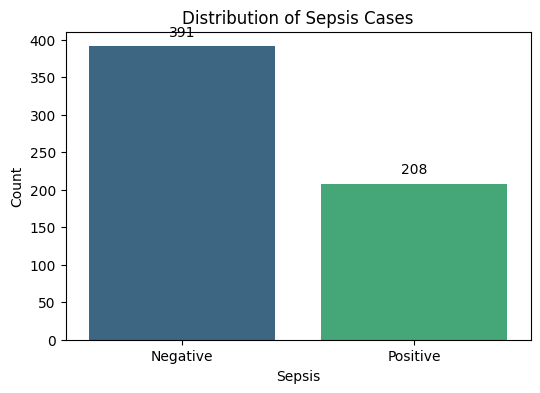

In [28]:
# Count the occurrences of each category in 'Sepssis'
sepsis_counts = train['Sepssis'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sepsis_counts.index, y=sepsis_counts.values, palette='viridis')
plt.title('Distribution of Sepsis Cases')
plt.xlabel('Sepsis')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Distribution of sepsis cases using a pie chart**

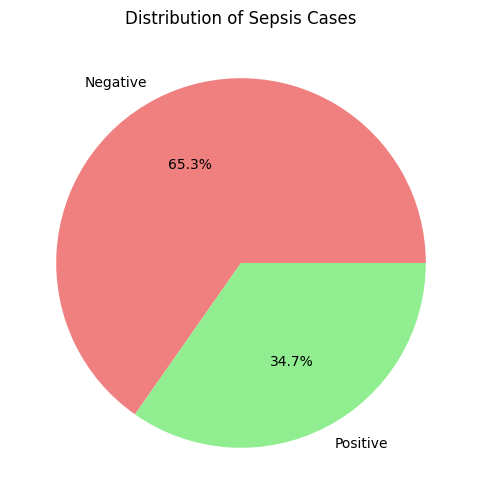

In [29]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sepsis_counts, labels=sepsis_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Sepsis Cases')
plt.show()

The distribution of the target variable, in this case, the "sepsis" column, indicates the proportion of each class within the dataset. The distribution is approximately 65.3% negative and 34.7% positive for sepsis.

Here's what this distribution suggest:

**Class Imbalance:**

The dataset exhibits class imbalance because the proportion of negative sepsis cases is significantly higher than positive cases. Class imbalance can impact the performance of machine learning models, especially if not addressed properly.

**Prevalence of Sepsis:**

The higher prevalence of negative cases (65.3%) suggests that sepsis might be relatively less common in the dataset. This is common in medical datasets where certain conditions, like sepsis, may occur less frequently.

**Model Performance Considerations:**

When building predictive models, it's important to be aware of class imbalance. Models might achieve high accuracy by simply predicting the majority class, but this doesn't necessarily indicate good performance, especially for detecting sepsis cases.

### Bivariate Analysis

**Correlation Analysis**

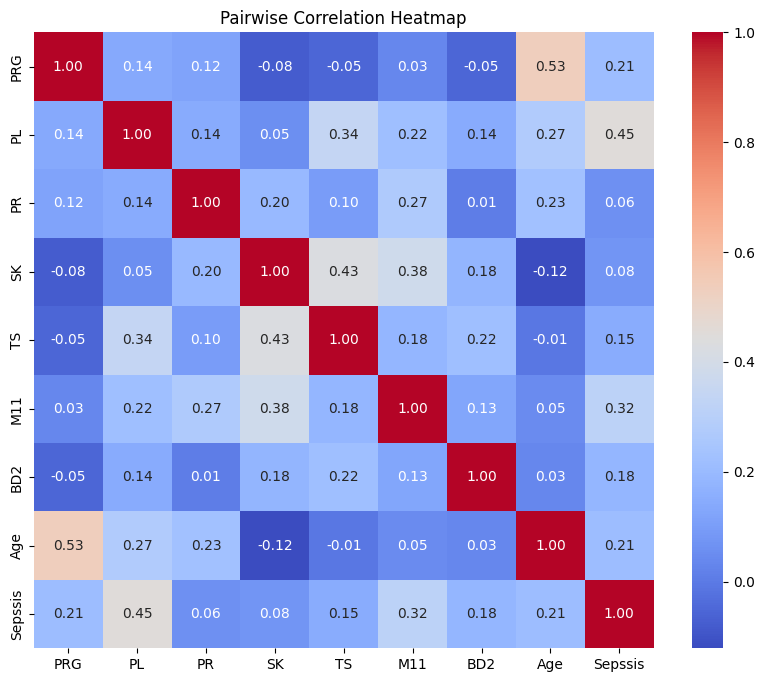

In [30]:
tc = train.copy()
tc['Sepssis'] = tc['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)

numeric_columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age','Sepssis']
correlation_matrix = tc[numeric_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

The provided correlation matrix shows the Pearson correlation coefficients between the "Sepssis" variable and other variables in the dataset. Here are some key observations:

**Positive Correlations:**

- The correlation coefficient between "Sepssis" and "PL" (0.449719) is positive, indicating a moderate positive relationship. This suggests that higher values of "PL" are associated with a higher likelihood of sepsis.

- The correlation between "Sepssis" and "Age" (0.210234) is also positive, indicating a positive relationship. This suggests that older individuals may have a slightly higher likelihood of sepsis.

- There is a positive correlation between "Sepssis" and "M11" (0.315894), suggesting that higher values of "M11" are associated with a higher likelihood of sepsis.

**Weaker Positive Correlations:**

- "PRG" and "PR" have positive correlations with "Sepssis" (0.207115 and 0.061086, respectively), but they are relatively weaker compared to other variables.

**Negative Correlations:**

- There is a negative correlation between "Sepssis" and "SK" (-0.080902), indicating a weak negative relationship. This suggests that higher values of "SK" are associated with a slightly lower likelihood of sepsis.

**Distribution of Sepsis Cases Across Age Groups**

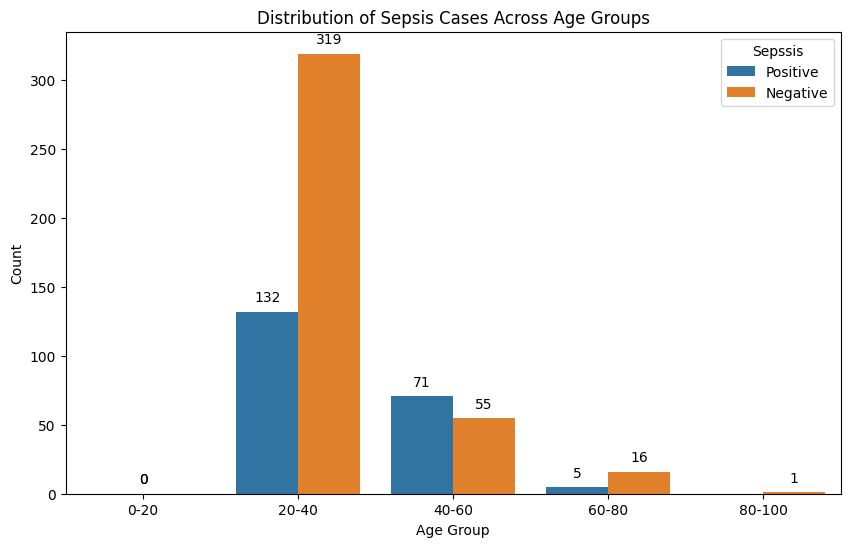

In [31]:
# Create age bins
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

tc = train.copy()

tc['Age_Group'] = pd.cut(tc['Age'], bins=age_bins, labels=age_labels)

# Visualize
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Group', hue='Sepssis', data=tc)
plt.title('Distribution of Sepsis Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The "Distribution of Sepsis Cases Across Age Groups" analysis aims to understand how cases of sepsis are distributed among different age groups. The outcome of this analysis provides insights into whether the occurrence of sepsis varies across age categories. Here are some potential outcomes and interpretations:

**Identification of Age-Related Patterns:**

The analysis reveal that there are specific age groups more prone to sepsis. In this case age group 20-40 may be more prone to sepsis than the other age groups, since the age group has the highest occurence of sepsis

**Risk Assessment:**

By examining the distribution, you can assess the relative risk of sepsis in different age groups. This information is valuable for healthcare professionals to understand population-level risk factors.

**Clinical Insights:**

The distribution may provide clinical insights into sepsis epidemiology. For instance, if there's a significant number of sepsis cases in a particular age group, healthcare providers might focus on tailored preventive measures or early detection strategies for that demographic.

**Distribution of Sepsis Cases Across BMI Categories**

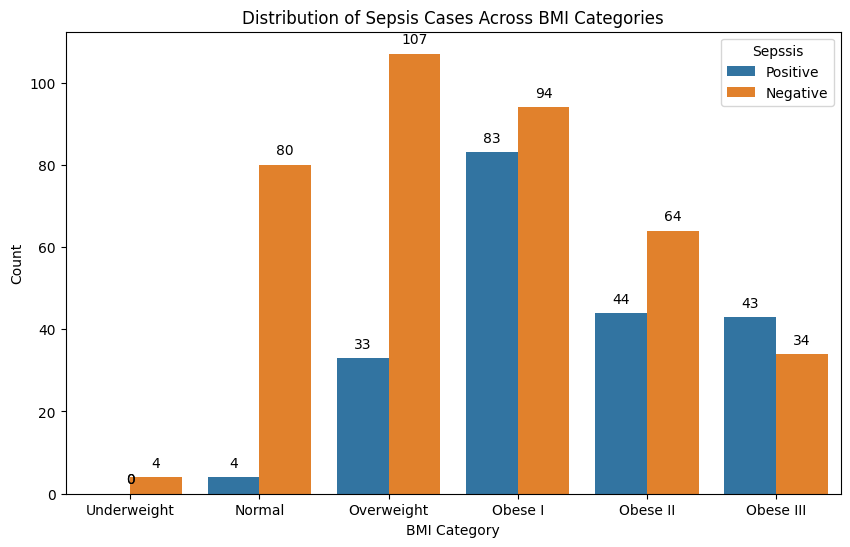

In [32]:
# Categorize BMI into ranges
tc = train.copy()
tc['BMI_Category'] = pd.cut(tc['M11'], bins=[0, 18.5, 25, 30, 35, 40, 100], labels=[
                            'Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])

# Visualize
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='BMI_Category', hue='Sepssis', data=tc)
plt.title('Distribution of Sepsis Cases Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The "Distribution of Sepsis Cases Across BMI Categories" analysis aims to understand how cases of sepsis are distributed among different BMI classes. The outcome of this analysis provides insights into whether the occurrence of sepsis varies across BMI classes. Here are some potential outcomes and interpretations:

**Identification of BMI Patterns:**

The analysis reveal that obese people are prone to sepsis. In this case all the obese classes Obese I, Obese II, Obese III, are way have the highest cases of sepsis

**Risk Assessment:**

By examining the distribution, we can assess the relative risk of sepsis in different BMI classes. This information is valuable for healthcare professionals to understand population-level risk factors.

**Clinical Insights:**

The distribution may provide clinical insights into sepsis epidemiology. For instance, if there's a significant number of sepsis cases in a particular BMI class, healthcare providers might focus on tailored preventive measures or early detection strategies for that demographic.

### Hypothesis Test

**(H<sub>0</sub>):** There is no significant association between the attributes (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) and the likelihood of a patient in the ICU developing sepsis.

**(H<sub>1</sub>):** There exists a significant association between at least one of the attributes (PRG, PL, PR, SK, TS, M11, BD2, Age, Insurance) and the likelihood of a patient in the ICU developing sepsis.

***How the test was done***
- ***Chi-squre***
- ***Logistic Regression***

The chi-square test assesses the independence of categorical variables. In this context, it examines whether the occurrence of sepsis ('Sepssis') is independent of the 'Insurance' status.

If the logistic regression model is able to predict if a person is likely to develop sepsis using the rest of the numerical data with a good bit of accuracy, then there is a reasonable association between sepsis and the feature that make up the dataset.


In [1]:
# create da copy of the train data
tc = train.copy()
tc['Sepssis'] = tc['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)

# Chi-square test
crosstab = pd.crosstab(tc['Sepssis'], tc['Insurance'])
chi2, p, _, _ = chi2_contingency(crosstab)
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")

# Logistic Regression
X = tc[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']]
y = tc['Sepssis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

NameError: name 'train' is not defined

**Chi-square Test:**

Chi-square Test Statistic: The chi-square test statistic is approximately 2.0713.
P-value: The associated p-value is approximately 0.1501.

**Evaluation:**

The chi-square test assesses the independence of categorical variables. In this context, it examines whether the occurrence of sepsis ('Sepssis') is independent of the 'Insurance' status.

The p-value of 0.1501 suggests that there is not enough evidence to reject the null hypothesis of independence. In other words, based on this test, there isn't a significant association between sepsis and insurance status.

**Logistic Regression Accuracy:**

Logistic Regression Accuracy: The logistic regression model achieves an accuracy of 75% on the test set.

**Interpretation:**
The logistic regression model, trained on features including 'Insurance', predicts the likelihood of sepsis.
An accuracy of 75% indicates that the model correctly predicts the sepsis status for 75% of the instances in the test set.

**Summary**
The lack of significant association in the chi-square test suggests that, according to this analysis, there isn't a strong relationship between sepsis and insurance status.

The logistic regression model, considering multiple features including 'Insurance', achieves a moderate accuracy in predicting sepsis.

### Questions

- What proportion of patients in the dataset holds valid insurance cards, and is there a noticeable difference in the development of sepsis between insured and uninsured patients?

pro = train.Insurance.graoupby("sepsis").count()

Proportion of patients with valid insurance cards: 68.61%


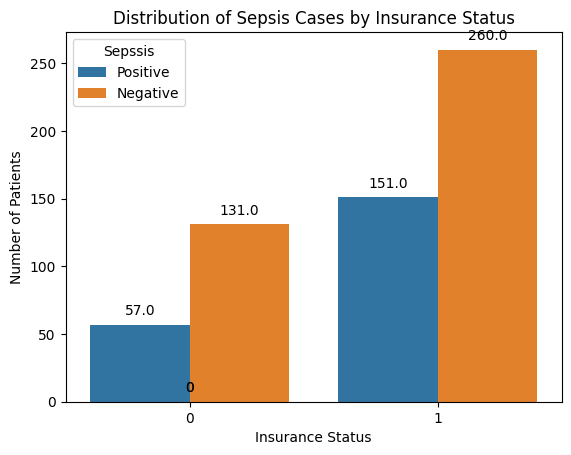

In [34]:
# The total number of patients
total_patients = len(train)

# Total number of insured patients

insured_patients = train['Insurance'].sum()


# proportion of insured patients

proportion_insured = insured_patients / total_patients

print(f"Proportion of patients with valid insurance cards: {proportion_insured:.2%}")


# Difference in sepsis development between insured and uninsured patients

sepsis_by_insurance = pd.crosstab(train['Insurance'], train['Sepssis'])


# Plot the distribution of sepsis cases by insurance status

ax = sns.countplot(x='Insurance', hue='Sepssis', data=train)

plt.title('Distribution of Sepsis Cases by Insurance Status')

plt.xlabel('Insurance Status')

plt.ylabel('Number of Patients')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

From the plot above, we can see that the number of patirnts with insurance that tested positive to sepsis is higher than the number of patirnts without insurance but tested positive to sepsis

- Are the atributes of the datatset (PRG, PL, PR, SK, TS, M11, BD2, Age) in anyway correlated with Sepsis


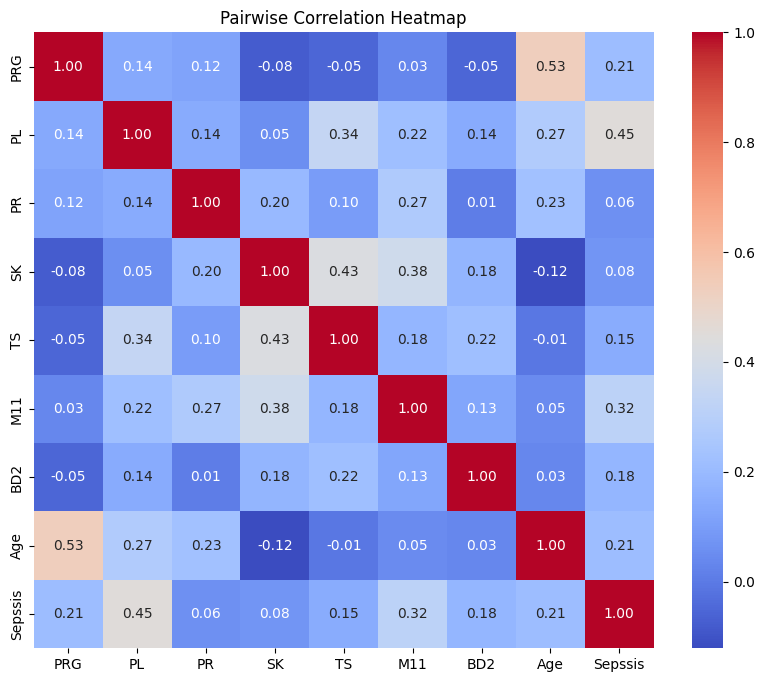

In [35]:
tc = train.copy()
tc['Sepssis'] = tc['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)

numeric_columns = ['PRG', 'PL', 'PR', 'SK',
                   'TS', 'M11', 'BD2', 'Age', 'Sepssis']
correlation_matrix = tc[numeric_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

when we inspect the correlation hit map above all the attributes have a weak positive correlation with reguards to sepsis, this may mean a combination of the attributes has an impact on the the sepsis status of the patients.

if we go back the the logistic regression in the hypothesis testing we saw that the model could predict the sepsis status at 75% accuracy.

- Top 10 patients with the higest BMI

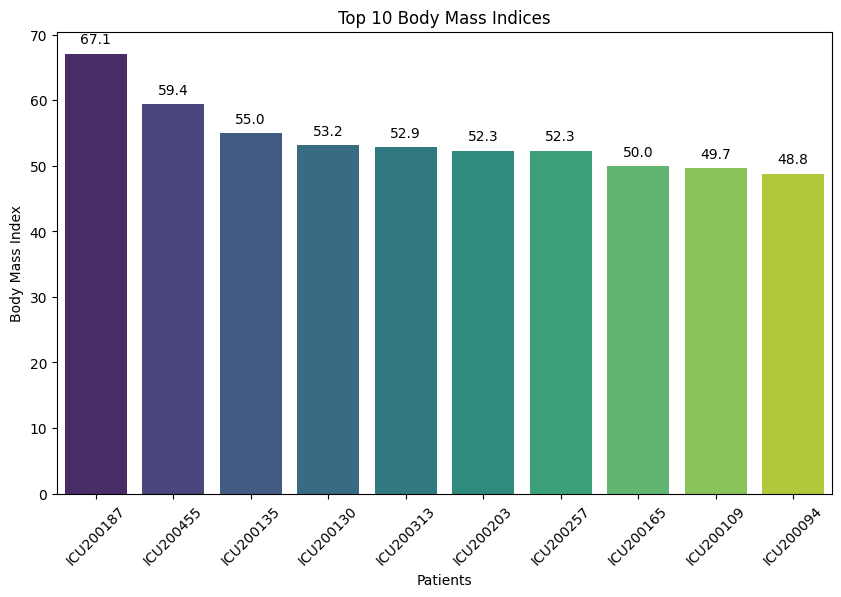

In [36]:
train = train.sort_values("M11", ascending=False)

# Select the top 10 rows
df = train.head(10)

# Visualize
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ID', y='M11', data=df, palette='viridis')
plt.title('Top 10 Body Mass Indices')
plt.xlabel('Patients')
plt.ylabel('Body Mass Index')

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [37]:
tc = train.copy()
tc['Sepssis'] = tc['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)

numeric_columns = ['PRG', 'Sepssis']
correlation_matrix = tc['PRG'].corr(tc['Sepssis'])
correlation_matrix

0.20711491012845182

- which Bloodwork Result has the highest number of patients with sepsis

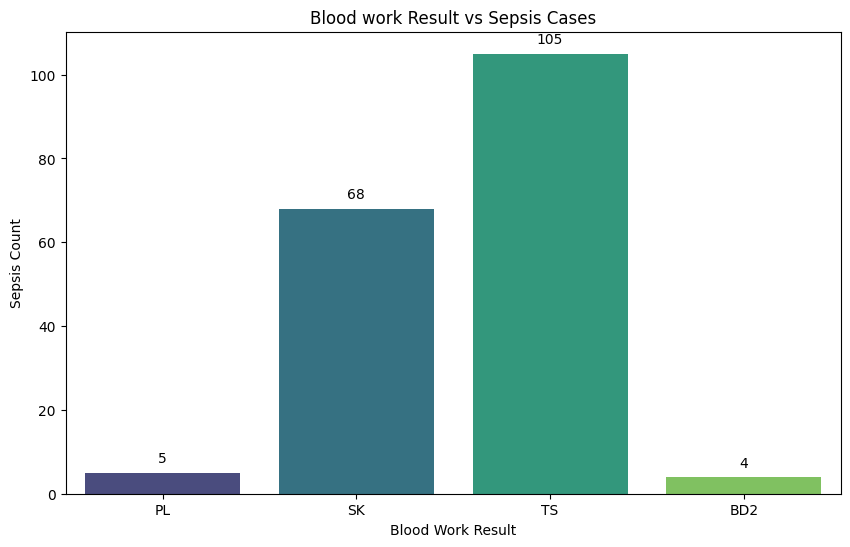

In [38]:
# blood work columns
columns = ["PL", "SK", "TS", "BD2"]

# dictionary for blood work vs sepsis count dataframe
dic = {"Blood_work":[], "Sepsis_count":[]}

#a copy of the train data so we don't meddile with it 
tc = train.copy()
tc['Sepssis'] = tc['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)

# function to create sepsis count column and to append dic with it
def blood_work(df):
    for values in columns:
        # Group by 'BloodworkResult' and calculate the sum of sepsis cases for each bloodwork result
        sepsis_by_bloodwork = df.groupby(values)["Sepssis"].sum()

        # Find the bloodwork result with the highest number of patients with sepsis
        #max_sepsis_bloodwork = sepsis_by_bloodwork.idxmax()
        max_sepsis_count = sepsis_by_bloodwork.max()

        #append dic
        dic["Blood_work"].append(values)
        dic["Sepsis_count"].append(max_sepsis_count)

# to apply the function
blood_work(tc)

# create dataframe from dic for the blood work result vs sepsis count
df = pd.DataFrame(dic)

# Bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Blood_work", y="Sepsis_count", data=df, palette='viridis')
plt.title('Blood work Result vs Sepsis Cases')
plt.xlabel('Blood Work Result')
plt.ylabel('Sepsis Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Blood Work Result TS had the higest number of positive sepsis patients

## Data Preparation

In [39]:
# copy of train dataset
t = train.copy()

# encoding y_train
t["Sepssis"] = t["Sepssis"].apply(lambda x: 1.0 if x == 'Positive' else 0.0)

#dropping target
X = t.drop("Sepssis", axis=1)

#set the encoded sepsis to the y value
y = t["Sepssis"]

### Feature Selection

In [40]:


tc = train.copy()

tc['Sepssis'] = tc['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)

#columns to check for correlation
cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Sepssis', "Insurance"]

for col in cols: 
    correlation_matrix = tc[col].corr(tc["Sepssis"])
    print("correlation between Sepssis and other columns")
    print(f"{col}: {correlation_matrix}")

# dropping unrequired columns  
X = X.drop(["ID", "Insurance", "PR"], axis=1)

correlation between Sepssis and other columns
PRG: 0.20711491012845182
correlation between Sepssis and other columns
PL: 0.4497192993768047
correlation between Sepssis and other columns
PR: 0.06108646368071452
correlation between Sepssis and other columns
SK: 0.07558515425850047
correlation between Sepssis and other columns
TS: 0.1458917526514363
correlation between Sepssis and other columns
M11: 0.31589377926855083
correlation between Sepssis and other columns
BD2: 0.18156126231918152
correlation between Sepssis and other columns
Age: 0.21023428582351425
correlation between Sepssis and other columns
Sepssis: 1.0
correlation between Sepssis and other columns
Insurance: 0.06258198660459564


- The ID column was dropped because it will not be relevant in our model trainning
- The PR column was dropped because it had little to no relationship with Sepsis
- The Insurance column was dropped because it had little to no relationship with Sepsis

Here data was split into tain and validation set

## Modeling

### Random forest classifer

In [2]:
tc = train.copy()

tc['Sepssis'] = tc['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)

# droping unrequired columns
tc = tc.drop(["ID", "Insurance", "PR"], axis=1)

#columns to deal with outliers
cols = ['PRG', 'PL', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Sepssis']

for col in cols:
    z_scores = np.abs(stats.zscore(tc[col]))
    threshold = 3

    # Identify and filter outliers
    outliers = tc[(z_scores > threshold)]
    Xc = tc[(z_scores <= threshold)]

# Log transform specific columns
log_columns = ['PRG', 'TS', 'BD2', 'Age']
Xc[log_columns] = np.log1p(Xc[log_columns])

X = Xc.drop("Sepssis", axis=1)
y = Xc["Sepssis"]


ros = RandomOverSampler(
    sampling_strategy='auto',
    random_state=0,
)

X_res, y_res = ros.fit_resample(X, y)

X_train1, X_valid1, y_train1, y_valid1 = train_test_split (X_res, y_res, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train1.shape, y_train1.shape)
print("Validation set shape:", X_valid1.shape, y_valid1.shape)

NameError: name 'train' is not defined

- **z_scores** was used to filter outliers
- **Log transformation** to normalize the columns that dont follow a normal destribution
- **RandomOverSampler** The RandomOverSampler works by randomly duplicating instances of the minority class until a more balanced distribution is achieved. It does not involve any complex algorithmic adjustments but rather adds more copies of the existing minority class



### Random Forest Classifier

In [43]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('scale_numeric', StandardScaler(), X.select_dtypes(
            include='number').columns.tolist()),
        ('log_transform', log_transformer, ['PRG', 'TS', 'BD2', 'Age'])
    ]
)

In [44]:
# Define the final pipeline with the preprocessor and the model
rf_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

In [45]:
# Fit the pipeline on the data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale_numeric',
                                                  StandardScaler(),
                                                  ['PRG', 'PL', 'SK', 'TS',
                                                   'M11', 'BD2', 'Age']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['PRG', 'TS', 'BD2',
                                                   'Age'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [46]:
# Make predictions using the Random Forest model
result_1 = rf_pipeline.predict(X_valid)

# predict X_train, will be used to calculate training accuracy
trf_pred = rf_pipeline.predict(X_train)

# Evaluate the Random Forest model
train_rf_accuracy = metrics.accuracy_score(y_train, trf_pred)

print(f"Train Random Forest Accuracy: {train_rf_accuracy}")

# Generate a classification report
report = classification_report(y_valid, result_1)

# calculate F2 score separately
f2_score = fbeta_score(y_valid, result_1, beta=2)

print(report)
print(f"F2 Score: {f2_score}")

Train Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85        74
         1.0       0.83      0.94      0.88        83

    accuracy                           0.87       157
   macro avg       0.88      0.86      0.86       157
weighted avg       0.87      0.87      0.87       157

F2 Score: 0.9154929577464789


Comparing the trainning accuracy to the validation accuracy we can say the model is generalizing well on new data ***Training accuracy = 1.0*** and validation accuracy is = 0.7, this values are not far apart.

The model appears to perform well on the training data, achieving high precision and recall for both classes



### K Neighbors Classifier

In [47]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('scale_numeric', StandardScaler(), X.select_dtypes(
            include='number').columns.tolist()),
        ('log_transform', log_transformer, ['PRG', 'TS', 'BD2', 'Age'])
    ]
)

In [48]:
# Define and train the K-Nearest Neighbors model
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(weights='distance')) #allows coser neighbors have more influence on the prediction than farther neighbors
])

In [49]:
knn_pipeline.fit(X_train1, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale_numeric',
                                                  StandardScaler(),
                                                  ['PRG', 'PL', 'SK', 'TS',
                                                   'M11', 'BD2', 'Age']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['PRG', 'TS', 'BD2',
                                                   'Age'])])),
                ('classifier', KNeighborsClassifier(weights='distance'))])

In [50]:
# Make predictions using the K-Nearest Neighbors model
result_5 = knn_pipeline.predict(X_valid)

# predicting x_train
tknn_pred = knn_pipeline.predict(X_train)

# knn train accuracy
train_knn_accuracy = metrics.accuracy_score(y_train, tknn_pred)
print(f"Train knn Accuracy: {train_knn_accuracy}")
print()

# Generate a classification report
report = classification_report(y_valid, result_5)

# calculate F2 score separately
f2_score = fbeta_score(y_valid, result_5, beta=2)

print(report)
print(f"F2 Score: {f2_score}")

Train knn Accuracy: 0.5328

              precision    recall  f1-score   support

         0.0       0.43      0.51      0.47        74
         1.0       0.48      0.40      0.43        83

    accuracy                           0.45       157
   macro avg       0.46      0.46      0.45       157
weighted avg       0.46      0.45      0.45       157

F2 Score: 0.41147132169576056


Comparing the trainning accuracy to the validation accuracy we can say the model is generalizing well on new data ***Training accuracy = 0.53*** and ***validation accuracy is = 0.45***, this values are not far apart.

The model appears to perform poorly on the training data, achieving low precision and recall for both classes.



### Logistic Regression classifier

In [51]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('scale_numeric', StandardScaler(), X.select_dtypes(include='number').columns.tolist()),
        ('log_transform', log_transformer, ['PRG', 'TS', 'BD2', 'Age'])
    ]
)

In [52]:
# Define and train the Logistic Regression model
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [53]:
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale_numeric',
                                                  StandardScaler(),
                                                  ['PRG', 'PL', 'SK', 'TS',
                                                   'M11', 'BD2', 'Age']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['PRG', 'TS', 'BD2',
                                                   'Age'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [54]:
# Make predictions using the Logistic Regression model
result_8 = logistic_pipeline.predict(X_valid)

# predicting x_train
tlog_predictions = logistic_pipeline.predict(X_train)

# train train accuracy
train_tlog_predictions = metrics.accuracy_score(y_train, tlog_predictions)
print(f"Train logistic Accuracy: {train_tlog_predictions}")
print()

# Generate a classification report
report = classification_report(y_valid, result_8)

# calculate F2 score separately
f2_score = fbeta_score(y_valid, result_8, beta=2)

print(report)
print(f"F2 Score: {f2_score}")

Train logistic Accuracy: 0.7344

              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72        74
         1.0       0.76      0.71      0.73        83

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.73      0.73      0.73       157

F2 Score: 0.7195121951219512


Comparing the trainning accuracy to the validation accuracy we can say the model is generalizing well on new data ***Training accuracy = 0.73*** and validation accuracy is = 0.73, this values are really close.

The model appears to perform well on the training data, achieving high precision and recall for both classes

### Gaussian Naive Bayes

In [55]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('scale_numeric', StandardScaler(), X.select_dtypes(
            include='number').columns.tolist()),
        ('log_transform', log_transformer, ['PRG', 'TS', 'BD2', 'Age'])
    ]
)

In [56]:
# Define and train the Naive Bayes model
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # Replace with Naive Bayes
])

In [57]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale_numeric',
                                                  StandardScaler(),
                                                  ['PRG', 'PL', 'SK', 'TS',
                                                   'M11', 'BD2', 'Age']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['PRG', 'TS', 'BD2',
                                                   'Age'])])),
                ('classifier', GaussianNB())])

In [58]:
# Make predictions using the Naive Bayes model
result_9 = nb_pipeline.predict(X_valid)

# predicting x_train
tnb_pred = nb_pipeline.predict(X_train)


# train  accuracy
train_nb_pred = metrics.accuracy_score(y_train, tnb_pred)
print(f"Train Naive Bayes Accuracy: {train_nb_pred}")
print()

# Generate a classification report
report = classification_report(y_valid, result_9
)

# calculate F2 score separately
f2_score = fbeta_score(y_valid, result_9
, beta=2)

print(report)
print(f"F2 Score: {f2_score}")

Train Naive Bayes Accuracy: 0.7088

              precision    recall  f1-score   support

         0.0       0.65      0.70      0.68        74
         1.0       0.71      0.66      0.69        83

    accuracy                           0.68       157
   macro avg       0.68      0.68      0.68       157
weighted avg       0.68      0.68      0.68       157

F2 Score: 0.6723716381418094


Comparing the trainning accuracy to the validation accuracy we can say the model is generalizing well on new data ***Training accuracy = 0.70*** and ***validation accuracy is = 0.68***, this values are not far apart.

The model appears to perform well on the training data, achieving high precision and recall for both classes



In [59]:
# create a dictionary for all the models
balance_result = {"Random Forest": result_1, "KNeighbors": result_5, "Logistic Regression": result_8, "Gaussian Naive Bayes": result_9}

for key, value in balance_result.items():
    print(f"Classification Report for {key}, is: \n\n", (classification_report(y_valid,value)))

Classification Report for Random Forest, is: 

               precision    recall  f1-score   support

         0.0       0.92      0.78      0.85        74
         1.0       0.83      0.94      0.88        83

    accuracy                           0.87       157
   macro avg       0.88      0.86      0.86       157
weighted avg       0.87      0.87      0.87       157

Classification Report for KNeighbors, is: 

               precision    recall  f1-score   support

         0.0       0.43      0.51      0.47        74
         1.0       0.48      0.40      0.43        83

    accuracy                           0.45       157
   macro avg       0.46      0.46      0.45       157
weighted avg       0.46      0.45      0.45       157

Classification Report for Logistic Regression, is: 

               precision    recall  f1-score   support

         0.0       0.70      0.74      0.72        74
         1.0       0.76      0.71      0.73        83

    accuracy                       

### Combining important metrics

In [60]:
# Create lists to store data
classifiers = []
precisions = []
accuracies = []
recalls = []
f1_scores = []
f2_scores = []

In [61]:
# Populate the lists with data
for key, value in balance_result.items():
    report = classification_report(y_valid, value, output_dict=True)
    f2 = fbeta_score(y_valid, value, beta=2)

    classifiers.append(key)
    precisions.append(report["weighted avg"]["precision"])
    accuracies.append(report["accuracy"])
    recalls.append(report["weighted avg"]["recall"])
    f1_scores.append(report["weighted avg"]["f1-score"])
    f2_scores.append(f2)

In [62]:
# Create a DataFrame
data = {
    "Classifier": classifiers,
    "Precision": precisions,
    "Accuracy": accuracies,
    "Recall": recalls,
    "F1-Score": f1_scores,
    "F2-Score": f2_scores
}

df = pd.DataFrame(data)

In [63]:
# Sort the DataFrame based on desired metrics
sorted_df = df.sort_values(
    by=["Precision", "Accuracy", "F1-Score", "Recall", "F2-Score"], ascending=False)
sorted_df = sorted_df.reset_index(drop=True)

In [64]:
# Print the sorted DataFrame
(sorted_df)

,Classifier,Precision,Accuracy,Recall,F1-Score,F2-Score
0,Random Forest,0.872607,0.866242,0.866242,0.865029,0.915493
1,Logistic Regression,0.728032,0.726115,0.726115,0.726337,0.719512
2,Gaussian Naive Bayes,0.683985,0.681529,0.681529,0.681761,0.672372
3,KNeighbors,0.456371,0.452229,0.452229,0.450672,0.411471


### Confusion Matrix for choosen model

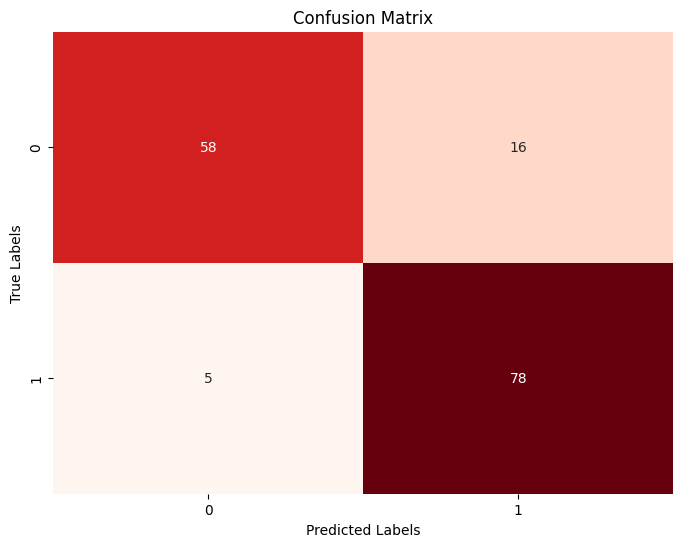

In [65]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_valid1, result_1)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Cross Validation

In [66]:
# Define the number of folds and other parameters
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=100)


# Evaluate the best model using K-Fold Cross Validation
scores = cross_val_score(rf_pipeline, X_train, y_train, cv=kf, scoring='accuracy')

#evaluation scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold + 1} Accuracy: {score:.4f}")

Fold 1 Accuracy: 0.8730
Fold 2 Accuracy: 0.7619
Fold 3 Accuracy: 0.9206
Fold 4 Accuracy: 0.9048
Fold 5 Accuracy: 0.7778
Fold 6 Accuracy: 0.8548
Fold 7 Accuracy: 0.8548
Fold 8 Accuracy: 0.8387
Fold 9 Accuracy: 0.8710
Fold 10 Accuracy: 0.8065


### Hyperparameter tuning

In [67]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False],
    'classifier__verbose': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator= rf_pipeline, param_grid= param_grid, scoring='accuracy', cv=5)

In [68]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_pipeline.get_params())

Parameters currently in use:

{'classifier': RandomForestClassifier(random_state=42),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': 42,
 'classifier__verbose': 0,
 'classifier__warm_start': False,
 'memory': None,
 'preprocessor': ColumnTransformer(transformers=[('scale_numeric', StandardScaler(),
                                 ['PRG', 'PL', 'SK', 'TS', 'M11', 'BD2',
                                  'Age']),
                                ('log_transform',
                      

In [69]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale_numeric',
                                                                         StandardScaler(),
                                                                         ['PRG',
                                                                          'PL',
                                                                          'SK',
                                                                          'TS',
                                                                          'M11',
                                                                          'BD2',
                                                                          'Age']),
                                                                        ('log_transform',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['PRG',
                                                                          'TS',
                                                                          'BD2',
                                                                          'Age'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200],
                         'classifier__verbose': [True, False]},
             scoring='accuracy')

In [70]:
# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_rf_model = grid_search.best_score_

# Print the results
print(f"Best Parameters: {best_params}")
print(f"best score is {best_rf_model}")

Best Parameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'classifier__verbose': True}
best score is 0.8368


In [71]:
# We get the best model
best_model = grid_search.best_estimator_

In [72]:
# view best model
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale_numeric',
                                                  StandardScaler(),
                                                  ['PRG', 'PL', 'SK', 'TS',
                                                   'M11', 'BD2', 'Age']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['PRG', 'TS', 'BD2',
                                                   'Age'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42,
                                        verbose=True))])

In [73]:
# use best model to predict
final_result = best_model.predict(test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [74]:
# Create a new DataFrame to store the results
result_df = pd.DataFrame(final_result, columns=["Sepssis"])

In [75]:
# Concatenate the original test set and the result DataFrame along the columns
final_test_with_sepsis = pd.concat([test, result_df], axis=1)

In [76]:
# we view to confirm changes
final_test_with_sepsis.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,0.0
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,0.0
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,0.0
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,0.0
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,1.0


In [77]:
# Save the best model
joblib.dump(best_model, 'best_model.joblib')

# Save the ColumnTransformer (which includes numerical and categorical pipelines)
joblib.dump(rf_pipeline, 'rf_pipline.joblib')

['rf_pipline.joblib']

In [78]:
# Creating a dictionary of objects to export
assets = {"pipeline": rf_pipeline,
           "model": best_model}

In [79]:
# Exporting the dictionary with Pickle
with open("Streamlit_toolkit", "wb") as file:
    pickle.dump(assets, file)